In [1]:
import torch
import torch.nn as nn
import pandas as pd 
from torchtext.vocab import vocab
from collections import Counter
from sklearn.metrics import f1_score
from torchvision import transforms, utils
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import accuracy_score
from sklearn.metrics import  confusion_matrix
import numpy as np

In [2]:
male_names = pd.read_csv(r'https://gist.githubusercontent.com/mbejda/7f86ca901fe41bc14a63/raw/38adb475c14a3f44df9999c1541f3a72f472b30d/Indian-Male-Names.csv')
female_names = pd.read_csv(r'https://gist.githubusercontent.com/mbejda/9b93c7545c9dd93060bd/raw/b582593330765df3ccaae6f641f8cddc16f1e879/Indian-Female-Names.csv')
names_df = male_names.append(female_names)
names_df.to_csv("indian_names.csv", index= False )
names_df = pd.read_csv("indian_names.csv")

In [3]:
names_np = names_df.to_numpy()

In [4]:
import math
#remove nan values
def remove_nan_entries(names_np):
  nan_entry = []
  for i in range(len(names_np)):
    try:
        if(math.isnan(names_np[i][0])):
            nan_entry.append(i)
    except:
        pass
  if(nan_entry != []):
    names_np=np.delete(names_np,np.array(nan_entry),axis=0)
  return names_np

#remove nan values
def clip_names_with_length_more_than_th(names_np,th=20):
  entry =[]
  for i in range(len(names_np)):
    try:
        if(len(names_np[i][0])>th):
            entry.append(i)
    except:
        pass
  if(entry != []):
    names_np=np.delete(names_np,np.array(entry),axis=0)
  return names_np

#remove nan values
def zero_padding(m_name,th=20):
  return (th-len(m_name))//2*'0'+ m_name+(th-len(m_name))//2*'0'+len(m_name)%2*'0'

#remove nan values
def padding_to_make_consant_length(names_np):
  for i in range(len(names_np)):
    names_np[i][0] = zero_padding(names_np[i][0])
  return names_np

names_np = remove_nan_entries(names_np)
names_np = clip_names_with_length_more_than_th(names_np)
names_np = padding_to_make_consant_length(names_np)

In [5]:
# Padding to make constant length
for i in range(len(names_np)):
    try:
        if(len(names_np[i][0])<20):
            names_np[i][0]=(20-len(names_np[i][0]))//2*'0'+names_np[i][0]+(20-len(names_np[i][0]))//2*'0'+len(names_np[i][0])%2*'0'
    except:
        pass
x=names_np[:,0]
y=names_np[:,1:2]

In [6]:
jn = ""
for entry in x:
  jn = jn + str(entry)

In [7]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
lbl=LabelEncoder()
one=OneHotEncoder()

y=lbl.fit_transform(y)
y=one.fit_transform(y.reshape(len(y),1)).toarray()

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [8]:
create_own_mapping = False
if(create_own_mapping == True):
  chars = sorted(list(set(jn)))
  mapping = dict((c, i) for i, c in enumerate(chars))
else:
  mapping = {'\t': 0, ' ': 1, '$': 2, '&': 3, '(': 4, ')': 5, ',': 6, '-': 7, '.': 8, '/': 9, '0': 10, '1': 11, '2': 12, '4': 13, '8': 14, '@': 15, '[': 16, '`': 17, 'a': 18, 'b': 19, 'c': 20, 'd': 21, 'e': 22, 'f': 23, 'g': 24, 'h': 25, 'i': 26, 'j': 27, 'k': 28, 'l': 29, 'm': 30, 'n': 31, 'o': 32, 'p': 33, 'q': 34, 'r': 35, 's': 36, 't': 37, 'u': 38, 'v': 39, 'w': 40, 'x': 41, 'y': 42, 'z': 43, 'ì': 44, 'ं': 45, 'अ': 46, 'आ': 47, 'इ': 48, 'ई': 49, 'उ': 50, 'ऐ': 51, 'क': 52, 'ख': 53, 'ग': 54, 'च': 55, 'छ': 56, 'ज': 57, 'ट': 58, 'ण': 59, 'त': 60, 'द': 61, 'ध': 62, 'न': 63, 'प': 64, 'फ': 65, 'ब': 66, 'भ': 67, 'म': 68, 'य': 69, 'र': 70, 'ल': 71, 'व': 72, 'श': 73, 'ष': 74, 'स': 75, 'ह': 76, '़': 77, 'ा': 78, 'ि': 79, 'ी': 80, 'ु': 81, 'ू': 82, 'े': 83, 'ै': 84, 'ो': 85, '्': 86, '\u200d': 87, '�': 88}

In [9]:
names = []
for line in x:
  encoded_seq = []
  for char in line:
    encoded_seq.append(int(mapping[char]))
  names.append(encoded_seq)

In [10]:
x=np.array(names).reshape(len(names),20,1)

In [11]:
print(x.shape,y.shape)

(29517, 20, 1) (29517, 2)


In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [18]:
#Model
from keras.layers import Input, Dense,LSTM
from keras.models import Model
inp = Input(shape=(20,1))
lstm_1 = LSTM(150,return_sequences=True)(inp)
lstm_2 = LSTM(100,return_sequences=True)(lstm_1)
lstm_3 = LSTM(50,return_sequences=True)(lstm_2)
lstm_4 = LSTM(30)(lstm_3)
out = Dense(2,activation='softmax')(lstm_4)

model = Model(inp,out)
print(model.summary())

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 20, 1)]           0         
                                                                 
 lstm_23 (LSTM)              (None, 20, 150)           91200     
                                                                 
 lstm_24 (LSTM)              (None, 20, 100)           100400    
                                                                 
 lstm_25 (LSTM)              (None, 20, 50)            30200     
                                                                 
 lstm_26 (LSTM)              (None, 30)                9720      
                                                                 
 dense_4 (Dense)             (None, 2)                 62        
                                                                 
Total params: 231,582
Trainable params: 231,582
Non-trainab

In [19]:
from keras.callbacks import ModelCheckpoint
model.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=["accuracy"])
checkpoint = ModelCheckpoint('best_weights.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')
model.fit(x_train,y_train,batch_size=50,epochs=100,verbose=1,callbacks=[checkpoint],validation_data=(x_test,y_test))

Epoch 1/100
413/414 [============================>.] - ETA: 0s - loss: 0.6153 - accuracy: 0.6550

414/414 [==============================] - 17s 16ms/step - loss: 0.6154 - accuracy: 0.6550 - val_loss: 0.5684 - val_accuracy: 0.7047
Epoch 2/100
414/414 [==============================] - ETA: 0s - loss: 0.5249 - accuracy: 0.7251

414/414 [==============================] - 9s 22ms/step - loss: 0.5249 - accuracy: 0.7251 - val_loss: 0.5078 - val_accuracy: 0.7355
Epoch 3/100
409/414 [============================>.] - ETA: 0s - loss: 0.4935 - accuracy: 0.7358

414/414 [==============================] - 6s 15ms/step - loss: 0.4939 - accuracy: 0.7355 - val_loss: 0.4823 - val_accuracy: 0.7555
Epoch 4/100
413/414 [============================>.] - ETA: 0s - loss: 0.4711 - accuracy: 0.7547

414/414 [==============================] - 5s 12ms/step - loss: 0.4711 - accuracy: 0.7546 - val_loss: 0.4572 - val_accuracy: 0.7778
Epoch 5/100
412/414 [============================>.] - ETA: 0s - loss: 0.4473 - accuracy: 0.7764

414/414 [==============================] - 5s 12ms/step - loss: 0.4472 - accuracy: 0.7764 - val_loss: 0.4522 - val_accuracy: 0.7795
Epoch 6/100
413/414 [============================>.] - ETA: 0s - loss: 0.4233 - accuracy: 0.7964

414/414 [==============================] - 5s 12ms/step - loss: 0.4233 - accuracy: 0.7965 - val_loss: 0.4247 - val_accuracy: 0.7960
Epoch 7/100
409/414 [============================>.] - ETA: 0s - loss: 0.3958 - accuracy: 0.8177

414/414 [==============================] - 5s 12ms/step - loss: 0.3963 - accuracy: 0.8176 - val_loss: 0.4243 - val_accuracy: 0.7928
Epoch 8/100
411/414 [============================>.] - ETA: 0s - loss: 0.3618 - accuracy: 0.8459

414/414 [==============================] - 5s 12ms/step - loss: 0.3617 - accuracy: 0.8460 - val_loss: 0.3547 - val_accuracy: 0.8622
Epoch 9/100
411/414 [============================>.] - ETA: 0s - loss: 0.3436 - accuracy: 0.8600

414/414 [==============================] - 5s 12ms/step - loss: 0.3437 - accuracy: 0.8599 - val_loss: 0.3389 - val_accuracy: 0.8652
Epoch 10/100
410/414 [============================>.] - ETA: 0s - loss: 0.3192 - accuracy: 0.8724

414/414 [==============================] - 5s 12ms/step - loss: 0.3194 - accuracy: 0.8725 - val_loss: 0.3256 - val_accuracy: 0.8759
Epoch 11/100
410/414 [============================>.] - ETA: 0s - loss: 0.3152 - accuracy: 0.8740

414/414 [==============================] - 5s 12ms/step - loss: 0.3148 - accuracy: 0.8743 - val_loss: 0.3206 - val_accuracy: 0.8773
Epoch 12/100
412/414 [============================>.] - ETA: 0s - loss: 0.2974 - accuracy: 0.8845

414/414 [==============================] - 5s 12ms/step - loss: 0.2974 - accuracy: 0.8844 - val_loss: 0.3101 - val_accuracy: 0.8765
Epoch 13/100
409/414 [============================>.] - ETA: 0s - loss: 0.2881 - accuracy: 0.8885

414/414 [==============================] - 5s 12ms/step - loss: 0.2877 - accuracy: 0.8886 - val_loss: 0.3095 - val_accuracy: 0.8805
Epoch 14/100
411/414 [============================>.] - ETA: 0s - loss: 0.2773 - accuracy: 0.8943

414/414 [==============================] - 5s 12ms/step - loss: 0.2773 - accuracy: 0.8942 - val_loss: 0.2943 - val_accuracy: 0.8844
Epoch 15/100
412/414 [============================>.] - ETA: 0s - loss: 0.2676 - accuracy: 0.8977

414/414 [==============================] - 5s 12ms/step - loss: 0.2677 - accuracy: 0.8977 - val_loss: 0.2998 - val_accuracy: 0.8849
Epoch 16/100
414/414 [==============================] - ETA: 0s - loss: 0.2574 - accuracy: 0.9033

414/414 [==============================] - 5s 12ms/step - loss: 0.2574 - accuracy: 0.9033 - val_loss: 0.2957 - val_accuracy: 0.8815
Epoch 17/100
409/414 [============================>.] - ETA: 0s - loss: 0.2480 - accuracy: 0.9067

414/414 [==============================] - 5s 12ms/step - loss: 0.2472 - accuracy: 0.9072 - val_loss: 0.2832 - val_accuracy: 0.8952
Epoch 18/100
409/414 [============================>.] - ETA: 0s - loss: 0.2440 - accuracy: 0.9077

414/414 [==============================] - 5s 12ms/step - loss: 0.2441 - accuracy: 0.9077 - val_loss: 0.2844 - val_accuracy: 0.8941
Epoch 19/100
411/414 [============================>.] - ETA: 0s - loss: 0.2346 - accuracy: 0.9118

414/414 [==============================] - 5s 12ms/step - loss: 0.2345 - accuracy: 0.9118 - val_loss: 0.2812 - val_accuracy: 0.8977
Epoch 20/100
411/414 [============================>.] - ETA: 0s - loss: 0.2307 - accuracy: 0.9127

414/414 [==============================] - 5s 12ms/step - loss: 0.2305 - accuracy: 0.9126 - val_loss: 0.2815 - val_accuracy: 0.8977
Epoch 21/100
413/414 [============================>.] - ETA: 0s - loss: 0.2192 - accuracy: 0.9199

414/414 [==============================] - 5s 12ms/step - loss: 0.2193 - accuracy: 0.9198 - val_loss: 0.3174 - val_accuracy: 0.8780
Epoch 22/100
414/414 [==============================] - ETA: 0s - loss: 0.2119 - accuracy: 0.9227

414/414 [==============================] - 6s 14ms/step - loss: 0.2119 - accuracy: 0.9227 - val_loss: 0.2737 - val_accuracy: 0.8994
Epoch 23/100
413/414 [============================>.] - ETA: 0s - loss: 0.2057 - accuracy: 0.9231

414/414 [==============================] - 5s 12ms/step - loss: 0.2057 - accuracy: 0.9230 - val_loss: 0.2738 - val_accuracy: 0.9040
Epoch 24/100
412/414 [============================>.] - ETA: 0s - loss: 0.1981 - accuracy: 0.9276

414/414 [==============================] - 5s 12ms/step - loss: 0.1979 - accuracy: 0.9277 - val_loss: 0.2685 - val_accuracy: 0.9064
Epoch 25/100
411/414 [============================>.] - ETA: 0s - loss: 0.1931 - accuracy: 0.9300

414/414 [==============================] - 5s 12ms/step - loss: 0.1933 - accuracy: 0.9299 - val_loss: 0.2843 - val_accuracy: 0.8970
Epoch 26/100
413/414 [============================>.] - ETA: 0s - loss: 0.1883 - accuracy: 0.9298

414/414 [==============================] - 5s 12ms/step - loss: 0.1882 - accuracy: 0.9299 - val_loss: 0.2769 - val_accuracy: 0.9006
Epoch 27/100
409/414 [============================>.] - ETA: 0s - loss: 0.1791 - accuracy: 0.9348

414/414 [==============================] - 5s 12ms/step - loss: 0.1787 - accuracy: 0.9349 - val_loss: 0.2865 - val_accuracy: 0.9026
Epoch 28/100
413/414 [============================>.] - ETA: 0s - loss: 0.1765 - accuracy: 0.9372

414/414 [==============================] - 5s 12ms/step - loss: 0.1765 - accuracy: 0.9372 - val_loss: 0.2639 - val_accuracy: 0.9084
Epoch 29/100
409/414 [============================>.] - ETA: 0s - loss: 0.1712 - accuracy: 0.9398

414/414 [==============================] - 5s 12ms/step - loss: 0.1710 - accuracy: 0.9397 - val_loss: 0.2824 - val_accuracy: 0.9011
Epoch 30/100
411/414 [============================>.] - ETA: 0s - loss: 0.1655 - accuracy: 0.9404

414/414 [==============================] - 5s 12ms/step - loss: 0.1652 - accuracy: 0.9404 - val_loss: 0.2815 - val_accuracy: 0.9046
Epoch 31/100
412/414 [============================>.] - ETA: 0s - loss: 0.1583 - accuracy: 0.9436

414/414 [==============================] - 5s 12ms/step - loss: 0.1584 - accuracy: 0.9437 - val_loss: 0.2870 - val_accuracy: 0.9045
Epoch 32/100
413/414 [============================>.] - ETA: 0s - loss: 0.1578 - accuracy: 0.9420

414/414 [==============================] - 5s 13ms/step - loss: 0.1577 - accuracy: 0.9421 - val_loss: 0.2852 - val_accuracy: 0.9102
Epoch 33/100
411/414 [============================>.] - ETA: 0s - loss: 0.1541 - accuracy: 0.9447

414/414 [==============================] - 5s 12ms/step - loss: 0.1539 - accuracy: 0.9448 - val_loss: 0.2855 - val_accuracy: 0.9073
Epoch 34/100
410/414 [============================>.] - ETA: 0s - loss: 0.1458 - accuracy: 0.9480

414/414 [==============================] - 5s 12ms/step - loss: 0.1463 - accuracy: 0.9478 - val_loss: 0.2853 - val_accuracy: 0.9072
Epoch 35/100
413/414 [============================>.] - ETA: 0s - loss: 0.1424 - accuracy: 0.9486

414/414 [==============================] - 5s 12ms/step - loss: 0.1424 - accuracy: 0.9486 - val_loss: 0.2875 - val_accuracy: 0.9080
Epoch 36/100
410/414 [============================>.] - ETA: 0s - loss: 0.1369 - accuracy: 0.9520

414/414 [==============================] - 5s 12ms/step - loss: 0.1368 - accuracy: 0.9520 - val_loss: 0.3089 - val_accuracy: 0.9001
Epoch 37/100
410/414 [============================>.] - ETA: 0s - loss: 0.1279 - accuracy: 0.9556

414/414 [==============================] - 5s 13ms/step - loss: 0.1280 - accuracy: 0.9556 - val_loss: 0.3051 - val_accuracy: 0.9090
Epoch 38/100
411/414 [============================>.] - ETA: 0s - loss: 0.1421 - accuracy: 0.9487

414/414 [==============================] - 5s 12ms/step - loss: 0.1424 - accuracy: 0.9486 - val_loss: 0.2995 - val_accuracy: 0.9107
Epoch 39/100
411/414 [============================>.] - ETA: 0s - loss: 0.1387 - accuracy: 0.9495

414/414 [==============================] - 5s 12ms/step - loss: 0.1387 - accuracy: 0.9495 - val_loss: 0.3015 - val_accuracy: 0.9076
Epoch 40/100
411/414 [============================>.] - ETA: 0s - loss: 0.1158 - accuracy: 0.9595

414/414 [==============================] - 5s 12ms/step - loss: 0.1159 - accuracy: 0.9595 - val_loss: 0.3240 - val_accuracy: 0.9047
Epoch 41/100
413/414 [============================>.] - ETA: 0s - loss: 0.1170 - accuracy: 0.9584

414/414 [==============================] - 5s 12ms/step - loss: 0.1169 - accuracy: 0.9584 - val_loss: 0.3251 - val_accuracy: 0.9055
Epoch 42/100
409/414 [============================>.] - ETA: 0s - loss: 0.1329 - accuracy: 0.9530

414/414 [==============================] - 5s 12ms/step - loss: 0.1330 - accuracy: 0.9529 - val_loss: 0.3192 - val_accuracy: 0.9058
Epoch 43/100
412/414 [============================>.] - ETA: 0s - loss: 0.1151 - accuracy: 0.9583

414/414 [==============================] - 5s 12ms/step - loss: 0.1150 - accuracy: 0.9583 - val_loss: 0.3298 - val_accuracy: 0.9075
Epoch 44/100
412/414 [============================>.] - ETA: 0s - loss: 0.1167 - accuracy: 0.9585

414/414 [==============================] - 5s 12ms/step - loss: 0.1168 - accuracy: 0.9585 - val_loss: 0.3106 - val_accuracy: 0.9058
Epoch 45/100
410/414 [============================>.] - ETA: 0s - loss: 0.1194 - accuracy: 0.9569

414/414 [==============================] - 5s 12ms/step - loss: 0.1203 - accuracy: 0.9564 - val_loss: 0.3219 - val_accuracy: 0.9093
Epoch 46/100
412/414 [============================>.] - ETA: 0s - loss: 0.1101 - accuracy: 0.9610

414/414 [==============================] - 5s 12ms/step - loss: 0.1101 - accuracy: 0.9609 - val_loss: 0.3121 - val_accuracy: 0.9032
Epoch 47/100
409/414 [============================>.] - ETA: 0s - loss: 0.1140 - accuracy: 0.9588

414/414 [==============================] - 5s 12ms/step - loss: 0.1137 - accuracy: 0.9589 - val_loss: 0.3211 - val_accuracy: 0.9121
Epoch 48/100
410/414 [============================>.] - ETA: 0s - loss: 0.1092 - accuracy: 0.9603

414/414 [==============================] - 7s 16ms/step - loss: 0.1092 - accuracy: 0.9603 - val_loss: 0.3184 - val_accuracy: 0.9070
Epoch 49/100
409/414 [============================>.] - ETA: 0s - loss: 0.1005 - accuracy: 0.9638

414/414 [==============================] - 5s 12ms/step - loss: 0.1001 - accuracy: 0.9639 - val_loss: 0.3402 - val_accuracy: 0.9062
Epoch 50/100
410/414 [============================>.] - ETA: 0s - loss: 0.1078 - accuracy: 0.9630

414/414 [==============================] - 5s 12ms/step - loss: 0.1080 - accuracy: 0.9630 - val_loss: 0.3417 - val_accuracy: 0.9088
Epoch 51/100
412/414 [============================>.] - ETA: 0s - loss: 0.1031 - accuracy: 0.9615

414/414 [==============================] - 5s 12ms/step - loss: 0.1029 - accuracy: 0.9616 - val_loss: 0.3444 - val_accuracy: 0.9088
Epoch 52/100
412/414 [============================>.] - ETA: 0s - loss: 0.1082 - accuracy: 0.9620

414/414 [==============================] - 5s 12ms/step - loss: 0.1090 - accuracy: 0.9616 - val_loss: 0.3552 - val_accuracy: 0.9086
Epoch 53/100
414/414 [==============================] - ETA: 0s - loss: 0.1075 - accuracy: 0.9615

414/414 [==============================] - 5s 12ms/step - loss: 0.1075 - accuracy: 0.9615 - val_loss: 0.3474 - val_accuracy: 0.9067
Epoch 54/100
414/414 [==============================] - ETA: 0s - loss: 0.0988 - accuracy: 0.9656

414/414 [==============================] - 5s 12ms/step - loss: 0.0988 - accuracy: 0.9656 - val_loss: 0.3592 - val_accuracy: 0.9119
Epoch 55/100
414/414 [==============================] - ETA: 0s - loss: 0.0986 - accuracy: 0.9649

414/414 [==============================] - 6s 13ms/step - loss: 0.0986 - accuracy: 0.9649 - val_loss: 0.3534 - val_accuracy: 0.9007
Epoch 56/100
411/414 [============================>.] - ETA: 0s - loss: 0.1044 - accuracy: 0.9633

414/414 [==============================] - 5s 12ms/step - loss: 0.1042 - accuracy: 0.9632 - val_loss: 0.3506 - val_accuracy: 0.9082
Epoch 57/100
410/414 [============================>.] - ETA: 0s - loss: 0.1129 - accuracy: 0.9595

414/414 [==============================] - 5s 12ms/step - loss: 0.1128 - accuracy: 0.9596 - val_loss: 0.3360 - val_accuracy: 0.9094
Epoch 58/100
413/414 [============================>.] - ETA: 0s - loss: 0.0951 - accuracy: 0.9668

414/414 [==============================] - 5s 13ms/step - loss: 0.0951 - accuracy: 0.9668 - val_loss: 0.3754 - val_accuracy: 0.9088
Epoch 59/100
414/414 [==============================] - ETA: 0s - loss: 0.0904 - accuracy: 0.9678

414/414 [==============================] - 5s 12ms/step - loss: 0.0904 - accuracy: 0.9678 - val_loss: 0.3720 - val_accuracy: 0.9126
Epoch 60/100
413/414 [============================>.] - ETA: 0s - loss: 0.0983 - accuracy: 0.9654

414/414 [==============================] - 5s 12ms/step - loss: 0.0983 - accuracy: 0.9654 - val_loss: 0.3601 - val_accuracy: 0.9096
Epoch 61/100
411/414 [============================>.] - ETA: 0s - loss: 0.0920 - accuracy: 0.9687

414/414 [==============================] - 5s 12ms/step - loss: 0.0917 - accuracy: 0.9688 - val_loss: 0.3626 - val_accuracy: 0.9128
Epoch 62/100
409/414 [============================>.] - ETA: 0s - loss: 0.0897 - accuracy: 0.9684

414/414 [==============================] - 5s 12ms/step - loss: 0.0898 - accuracy: 0.9684 - val_loss: 0.3512 - val_accuracy: 0.9101
Epoch 63/100
411/414 [============================>.] - ETA: 0s - loss: 0.0830 - accuracy: 0.9700

414/414 [==============================] - 5s 12ms/step - loss: 0.0834 - accuracy: 0.9699 - val_loss: 0.3665 - val_accuracy: 0.9132
Epoch 64/100
414/414 [==============================] - ETA: 0s - loss: 0.0985 - accuracy: 0.9650

414/414 [==============================] - 5s 12ms/step - loss: 0.0985 - accuracy: 0.9650 - val_loss: 0.3509 - val_accuracy: 0.9114
Epoch 65/100
411/414 [============================>.] - ETA: 0s - loss: 0.0808 - accuracy: 0.9713

414/414 [==============================] - 5s 12ms/step - loss: 0.0809 - accuracy: 0.9713 - val_loss: 0.3874 - val_accuracy: 0.9084
Epoch 66/100
414/414 [==============================] - ETA: 0s - loss: 0.0908 - accuracy: 0.9672

414/414 [==============================] - 5s 12ms/step - loss: 0.0908 - accuracy: 0.9672 - val_loss: 0.3656 - val_accuracy: 0.9066
Epoch 67/100
414/414 [==============================] - ETA: 0s - loss: 0.0822 - accuracy: 0.9717

414/414 [==============================] - 5s 12ms/step - loss: 0.0822 - accuracy: 0.9717 - val_loss: 0.3619 - val_accuracy: 0.9136
Epoch 68/100
410/414 [============================>.] - ETA: 0s - loss: 0.0944 - accuracy: 0.9657

414/414 [==============================] - 5s 12ms/step - loss: 0.0942 - accuracy: 0.9658 - val_loss: 0.3617 - val_accuracy: 0.9125
Epoch 69/100
413/414 [============================>.] - ETA: 0s - loss: 0.0907 - accuracy: 0.9669

414/414 [==============================] - 9s 21ms/step - loss: 0.0906 - accuracy: 0.9669 - val_loss: 0.3574 - val_accuracy: 0.9058
Epoch 70/100
412/414 [============================>.] - ETA: 0s - loss: 0.0846 - accuracy: 0.9692

414/414 [==============================] - 10s 23ms/step - loss: 0.0846 - accuracy: 0.9691 - val_loss: 0.3569 - val_accuracy: 0.9063
Epoch 71/100
413/414 [============================>.] - ETA: 0s - loss: 0.0877 - accuracy: 0.9690

414/414 [==============================] - 5s 12ms/step - loss: 0.0877 - accuracy: 0.9690 - val_loss: 0.3568 - val_accuracy: 0.9066
Epoch 72/100
410/414 [============================>.] - ETA: 0s - loss: 0.0864 - accuracy: 0.9688

414/414 [==============================] - 5s 12ms/step - loss: 0.0868 - accuracy: 0.9687 - val_loss: 0.3679 - val_accuracy: 0.9096
Epoch 73/100
413/414 [============================>.] - ETA: 0s - loss: 0.0820 - accuracy: 0.9708

414/414 [==============================] - 5s 12ms/step - loss: 0.0821 - accuracy: 0.9708 - val_loss: 0.3854 - val_accuracy: 0.9102
Epoch 74/100
412/414 [============================>.] - ETA: 0s - loss: 0.0951 - accuracy: 0.9672

414/414 [==============================] - 5s 12ms/step - loss: 0.0952 - accuracy: 0.9672 - val_loss: 0.3590 - val_accuracy: 0.9099
Epoch 75/100
413/414 [============================>.] - ETA: 0s - loss: 0.0839 - accuracy: 0.9703

414/414 [==============================] - 5s 12ms/step - loss: 0.0838 - accuracy: 0.9703 - val_loss: 0.3886 - val_accuracy: 0.9072
Epoch 76/100
409/414 [============================>.] - ETA: 0s - loss: 0.0825 - accuracy: 0.9708

414/414 [==============================] - 5s 12ms/step - loss: 0.0825 - accuracy: 0.9709 - val_loss: 0.3836 - val_accuracy: 0.9048
Epoch 77/100
410/414 [============================>.] - ETA: 0s - loss: 0.0795 - accuracy: 0.9711

414/414 [==============================] - 5s 12ms/step - loss: 0.0794 - accuracy: 0.9711 - val_loss: 0.4034 - val_accuracy: 0.9072
Epoch 78/100
409/414 [============================>.] - ETA: 0s - loss: 0.0903 - accuracy: 0.9688

414/414 [==============================] - 5s 12ms/step - loss: 0.0899 - accuracy: 0.9689 - val_loss: 0.3747 - val_accuracy: 0.9110
Epoch 79/100
413/414 [============================>.] - ETA: 0s - loss: 0.0799 - accuracy: 0.9719

414/414 [==============================] - 5s 12ms/step - loss: 0.0799 - accuracy: 0.9719 - val_loss: 0.3701 - val_accuracy: 0.9129
Epoch 80/100
411/414 [============================>.] - ETA: 0s - loss: 0.0728 - accuracy: 0.9740

414/414 [==============================] - 5s 12ms/step - loss: 0.0728 - accuracy: 0.9740 - val_loss: 0.3826 - val_accuracy: 0.9163
Epoch 81/100
412/414 [============================>.] - ETA: 0s - loss: 0.0770 - accuracy: 0.9719

414/414 [==============================] - 5s 12ms/step - loss: 0.0769 - accuracy: 0.9720 - val_loss: 0.3965 - val_accuracy: 0.9098
Epoch 82/100
414/414 [==============================] - ETA: 0s - loss: 0.0849 - accuracy: 0.9704

414/414 [==============================] - 5s 12ms/step - loss: 0.0849 - accuracy: 0.9704 - val_loss: 0.3459 - val_accuracy: 0.9068
Epoch 83/100
413/414 [============================>.] - ETA: 0s - loss: 0.0871 - accuracy: 0.9696

414/414 [==============================] - 5s 12ms/step - loss: 0.0871 - accuracy: 0.9697 - val_loss: 0.3587 - val_accuracy: 0.9101
Epoch 84/100
414/414 [==============================] - ETA: 0s - loss: 0.0800 - accuracy: 0.9713

414/414 [==============================] - 5s 12ms/step - loss: 0.0800 - accuracy: 0.9713 - val_loss: 0.3900 - val_accuracy: 0.9036
Epoch 85/100
411/414 [============================>.] - ETA: 0s - loss: 0.0804 - accuracy: 0.9720

414/414 [==============================] - 5s 12ms/step - loss: 0.0802 - accuracy: 0.9720 - val_loss: 0.3753 - val_accuracy: 0.9097
Epoch 86/100
414/414 [==============================] - ETA: 0s - loss: 0.0738 - accuracy: 0.9728

414/414 [==============================] - 5s 12ms/step - loss: 0.0738 - accuracy: 0.9728 - val_loss: 0.3881 - val_accuracy: 0.9079
Epoch 87/100
414/414 [==============================] - ETA: 0s - loss: 0.0764 - accuracy: 0.9720

414/414 [==============================] - 7s 16ms/step - loss: 0.0764 - accuracy: 0.9720 - val_loss: 0.3853 - val_accuracy: 0.9118
Epoch 88/100
412/414 [============================>.] - ETA: 0s - loss: 0.0794 - accuracy: 0.9715

414/414 [==============================] - 5s 12ms/step - loss: 0.0800 - accuracy: 0.9713 - val_loss: 0.3980 - val_accuracy: 0.9041
Epoch 89/100
411/414 [============================>.] - ETA: 0s - loss: 0.0798 - accuracy: 0.9711

414/414 [==============================] - 7s 16ms/step - loss: 0.0799 - accuracy: 0.9711 - val_loss: 0.3794 - val_accuracy: 0.9118
Epoch 90/100
414/414 [==============================] - ETA: 0s - loss: 0.0864 - accuracy: 0.9693

414/414 [==============================] - 5s 12ms/step - loss: 0.0864 - accuracy: 0.9693 - val_loss: 0.3777 - val_accuracy: 0.9064
Epoch 91/100
412/414 [============================>.] - ETA: 0s - loss: 0.0746 - accuracy: 0.9729

414/414 [==============================] - 5s 12ms/step - loss: 0.0745 - accuracy: 0.9729 - val_loss: 0.3911 - val_accuracy: 0.9142
Epoch 92/100
410/414 [============================>.] - ETA: 0s - loss: 0.0678 - accuracy: 0.9755

414/414 [==============================] - 5s 13ms/step - loss: 0.0678 - accuracy: 0.9755 - val_loss: 0.3954 - val_accuracy: 0.9147
Epoch 93/100
413/414 [============================>.] - ETA: 0s - loss: 0.0725 - accuracy: 0.9734

414/414 [==============================] - 6s 15ms/step - loss: 0.0725 - accuracy: 0.9734 - val_loss: 0.4107 - val_accuracy: 0.9100
Epoch 94/100
411/414 [============================>.] - ETA: 0s - loss: 0.0710 - accuracy: 0.9739

414/414 [==============================] - 5s 12ms/step - loss: 0.0712 - accuracy: 0.9739 - val_loss: 0.4195 - val_accuracy: 0.9111
Epoch 95/100
411/414 [============================>.] - ETA: 0s - loss: 0.0894 - accuracy: 0.9671

414/414 [==============================] - 5s 12ms/step - loss: 0.0892 - accuracy: 0.9672 - val_loss: 0.3671 - val_accuracy: 0.9117
Epoch 96/100
412/414 [============================>.] - ETA: 0s - loss: 0.0654 - accuracy: 0.9766

414/414 [==============================] - 5s 12ms/step - loss: 0.0657 - accuracy: 0.9764 - val_loss: 0.3875 - val_accuracy: 0.9143
Epoch 97/100
414/414 [==============================] - ETA: 0s - loss: 0.0765 - accuracy: 0.9733

414/414 [==============================] - 5s 12ms/step - loss: 0.0765 - accuracy: 0.9733 - val_loss: 0.3895 - val_accuracy: 0.9115
Epoch 98/100
410/414 [============================>.] - ETA: 0s - loss: 0.0929 - accuracy: 0.9681

414/414 [==============================] - 5s 12ms/step - loss: 0.0929 - accuracy: 0.9680 - val_loss: 0.3531 - val_accuracy: 0.9055
Epoch 99/100
412/414 [============================>.] - ETA: 0s - loss: 0.0897 - accuracy: 0.9680

414/414 [==============================] - 5s 12ms/step - loss: 0.0899 - accuracy: 0.9679 - val_loss: 0.3653 - val_accuracy: 0.9133
Epoch 100/100
412/414 [============================>.] - ETA: 0s - loss: 0.0692 - accuracy: 0.9751

414/414 [==============================] - 5s 12ms/step - loss: 0.0691 - accuracy: 0.9751 - val_loss: 0.3878 - val_accuracy: 0.9116


In [20]:
model.save_weights('best_weights.hdf5')

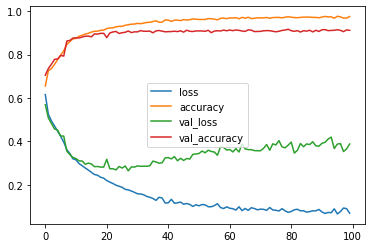

In [24]:
history = model.history.history

import matplotlib.pyplot as plt
plt.plot(history['loss'])
plt.plot(history['accuracy'])
plt.plot(history['val_loss'])
plt.plot(history['val_accuracy'])
plt.legend(['loss','accuracy','val_loss','val_accuracy'])
plt.show()

In [25]:
model.evaluate(x_test,y_test)

277/277 [==============================] - 1s 5ms/step - loss: 0.3878 - accuracy: 0.9116


[0.3877893090248108, 0.9115853905677795]

In [26]:
def encoded_sequence(padded_str,mapping):
  encoded_seq = []
  for char in padded_str:
    encoded_seq.append(int(mapping[char]))
  return encoded_seq

def predict_gender(model,m_name):
  m_name = m_name.lower()
  encoded_seq = encoded_sequence(zero_padding(m_name),mapping)
  np_encoded_seq = np.array(encoded_seq).reshape(1,20,1)
  confidence = model.predict(np_encoded_seq)[0]
  confidence = list(confidence)
  if(confidence.index(max(confidence)) == 0):
    return m_name.upper() + " -> Female " + str(round(max(confidence)*100)) + "%"
  else:
    return m_name.upper() + " -> Male " + str(round(max(confidence)*100)) + "%"

In [27]:
names = ["PK Adhya Kumari","Aarvi Saxena KK","Ahaana","Bela Caio","Dhara","Diya Mirza","Prisha Upadhyay","Aanya Pandey","Hari Mehta","Hans Hanthi","Jagan Mohan","Jai Shree","Kala Bagga","Kamal Hasan","Kanan Gill","Milan","Rahul Kumar","Tarak","Aatma Ram","Vihaan Jain","Wali Rehmani"]
for name in names:
  print(predict_gender(model,name))

PK ADHYA KUMARI -> Female 100%
AARVI SAXENA KK -> Male 99%
AHAANA -> Female 99%
BELA CAIO -> Female 100%
DHARA -> Female 64%
DIYA MIRZA -> Female 100%
PRISHA UPADHYAY -> Female 100%
AANYA PANDEY -> Female 98%
HARI MEHTA -> Male 99%
HANS HANTHI -> Male 99%
JAGAN MOHAN -> Male 98%
JAI SHREE -> Male 98%
KALA BAGGA -> Female 100%
KAMAL HASAN -> Male 99%
KANAN GILL -> Female 94%
MILAN -> Female 59%
RAHUL KUMAR -> Male 100%
TARAK -> Male 93%
AATMA RAM -> Male 100%
VIHAAN JAIN -> Male 100%
WALI REHMANI -> Male 82%
